# Using `generators`

In [1]:
%load_ext autoreload
%autoreload 2
# import sys
# sys.path.append('../')

from PyBMF.generators import SyntheticMatrixGenerator, BlockDiagonalMatrixGenerator, BlockMatrixGenerator
from PyBMF.utils.display import show_matrix
from copy import deepcopy

c:\Users\nieht\Anaconda3\envs\pybmf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# common parameters
n_row=200
n_col=300
k=5
noise=[0.4, 0.1]
seed=1024

# for SyntheticMatrixGenerator
density=[0.1, 0.4]

# for BlockDiagonalMatrixGenerator
overlap=[0.2, 0.2]

# for BlockMatrixGenerator
overlap_flag=True
size_range=[0.5, 1.0, 0.5, 1.0]

# 1. Diagonal Boolean matrix

This generates a diagonal Boolean matrix which can lated be matrix-wise shuffled, factor-wise shuffled or noised.

Since a diagonal Boolean matrix comes with continuous-1's property (C1P) by nature, we can see the index before matrix-wise shuffling is ordered.

Key settings:

- `overlap` defines how you wish the patterns overlap with each other. `overlap` is formatted as (`overlap_u`, `span_u`, `overlap_v`, `span_v`).
- In the next example, `overlap=[0.2, 0.1, 0.2, 0.1]` means each bottom-right corner `(x0, y0)` will land within a rectangle `(x1 + (0.2 ± 0.1) * a1, y1 + (0.2 ± 0.1) * b1)`. `(x1, y1)` is the coordinate of top-left corner of the next pattern and `a1, b1` is the dimension of the next pattern.

- The `overlap_u` and `overlap_v` can be negative, means there's no overlap.
- In the example below, `overlap=[-0.1, 0.1, -0.1, 0.1]` means each bottom-right corner `(x0, y0)` will land within a rectangle `(x1 + (-0.1 ± 0.1) * a0, y1 + (-0.1 ± 0.1) * b0)`. `a0, b0` is the dimension of the current pattern.

[I] m            : 200
[I] n            : 300
[I] k            : 5
[I] overlap      : 2
[I] seed         : 1024


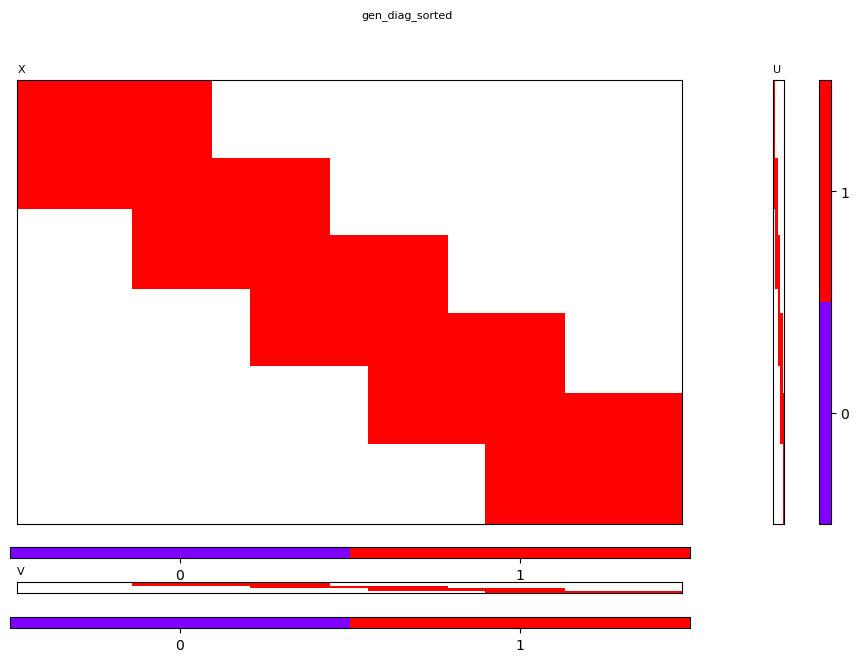

<Figure size 640x480 with 0 Axes>

In [19]:
# positive overlap means overlap

gen_diag_sorted = BlockDiagonalMatrixGenerator(m=n_row, n=n_col, k=k, overlap=[0.4, 0.4])
gen_diag_sorted.generate(seed=seed) # if no seed assigned, use time instead

gen_diag_sorted.show_matrix(title="gen_diag_sorted")

[I] m            : 200
[I] n            : 300
[I] k            : 5
[I] overlap      : 2
[I] seed         : 1024


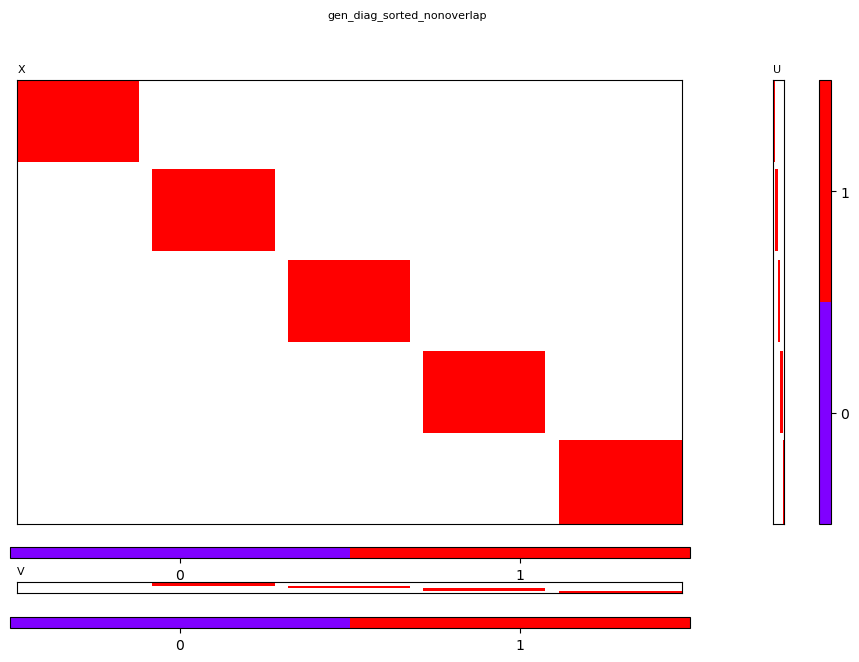

<Figure size 640x480 with 0 Axes>

In [20]:
# negative overlap means no overlap

gen_diag_sorted_nonoverlap = BlockDiagonalMatrixGenerator(m=n_row, n=n_col, k=k, overlap=[-0.1, -0.1])
gen_diag_sorted_nonoverlap.generate(seed=seed) # if no seed assigned, use time instead

gen_diag_sorted_nonoverlap.show_matrix(title="gen_diag_sorted_nonoverlap")

The method `shuffle_factors()` shuffles the columns of U and rows of V to rearrange patterns.

Note that shuffling factors can change the overlapping property. The example below shows how shuffling seperates the overlapped patterns.

[I] seed         : 1024
[I] Using RandomState.
[I] Using RandomState.


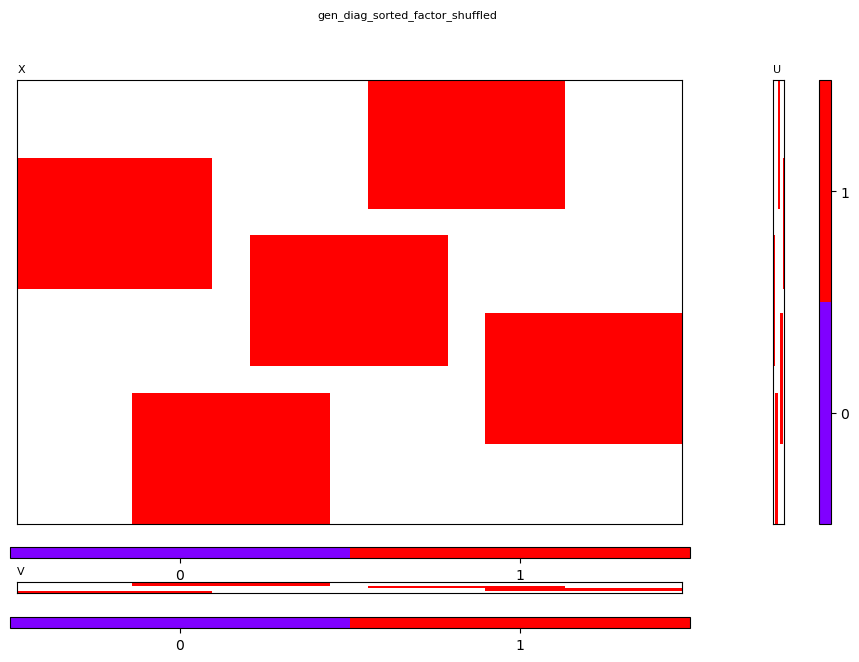

<Figure size 640x480 with 0 Axes>

In [21]:
# shuffling factors

gen_diag_sorted_factor_shuffled = deepcopy(gen_diag_sorted)
gen_diag_sorted_factor_shuffled.shuffle_factors(seed=seed) # you can shuffle with a new seed
# new seed will overwrite the random state of the matrix

gen_diag_sorted_factor_shuffled.show_matrix(title="gen_diag_sorted_factor_shuffled") 

The method `shuffle()` shuffles the columns and rows of X to disorganize patterns.

Shuffled index will be updated automatically. You can also manually re-assign the indecies to match your need.

[I] seed         : 1024
[I] Using RandomState.
[I] Using RandomState.


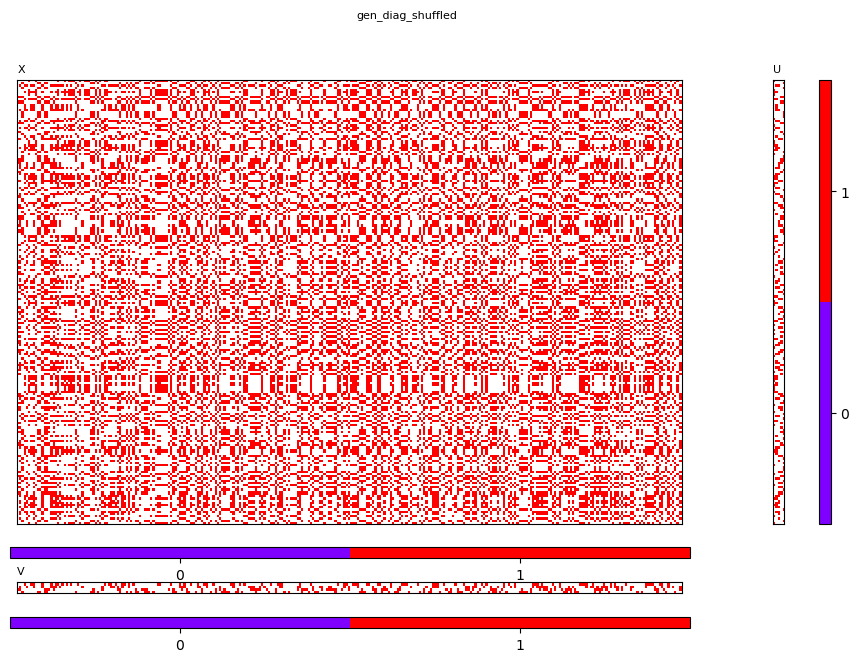

<Figure size 640x480 with 0 Axes>

In [22]:
# shuffling the whole matrix

gen_diag_shuffled = deepcopy(gen_diag_sorted)
gen_diag_shuffled.shuffle(seed=seed)

gen_diag_shuffled.show_matrix(title="gen_diag_shuffled")

# # you'll see the original matrix before shuffling. show_matrix will retrace the order by U/V_order.
# # to see real the shuffled matrix, use display.show_matrix:

# settings = [(gen_diag_shuffled.X, [0, 0], "X"), 
#             (gen_diag_shuffled.U, [0, 1], "U"), 
#             (gen_diag_shuffled.V.T, [1, 0], "V")]

# show_matrix(settings=settings, colorbar=True, discrete=True, pixels=5, clim=[0, 1], title="gen_diag_shuffled")

In [23]:
# # index before and after shuffling

# print(gen_diag_sorted.U_order[:10])
# print(gen_diag_shuffled.U_order[:10])

The method `add_noise()` flip the bits of the matrix with probability (p_pos, p_neg).

In [24]:
noise

[0.4, 0.1]

[I] noise        : 2
[I] seed         : 1024
[I] Using RandomState.


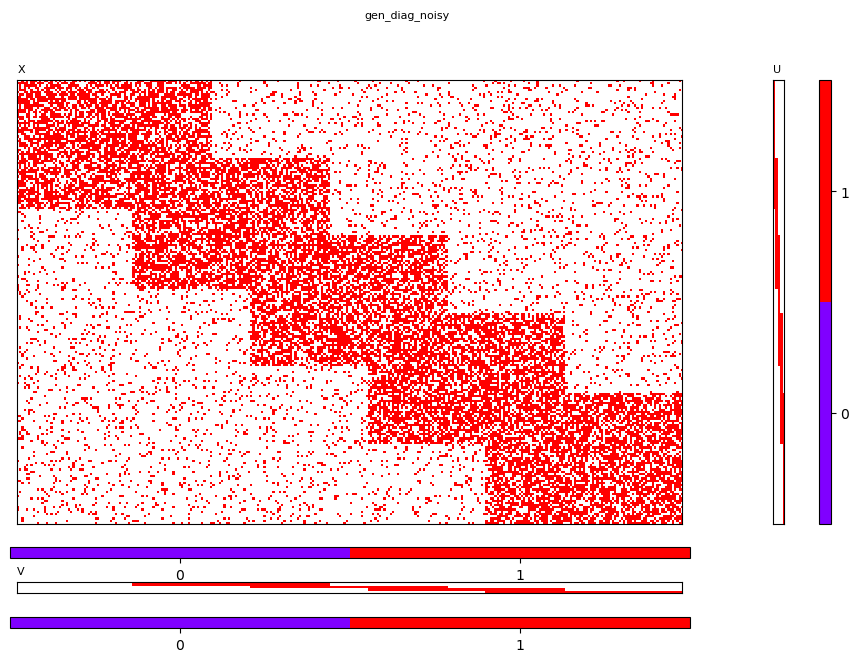

<Figure size 640x480 with 0 Axes>

In [25]:
# adding noise

gen_diag_noisy = deepcopy(gen_diag_sorted)
gen_diag_noisy.add_noise(noise=noise, seed=seed)

gen_diag_noisy.show_matrix(title="gen_diag_noisy") 

# 2. Arbitrary Boolean matrix

This generates an 'arbitrary' Boolean matrix with randomly distributed blocks.

Since an arbitrary Boolean matrix comes with continuous-1's property (C1P) by nature, the index before matrix-wise shuffling is ordered.

[I] m            : 200
[I] n            : 300
[I] k            : 5
[I] overlap_flag : True
[I] size_range   : 4
[I] overlap_flag : True
[I] size_range   : [0.5 2.  0.5 2. ]
[I] seed         : 1721725553
[I]   generate factor trials:  1
[I]   generate factor trials:  1
[I]   generate factor trials:  2
[I]   generate factor trials:  3
[I]   generate factor trials:  4
[I]   generate factor trials:  5
[I]   check overlap trials:  1


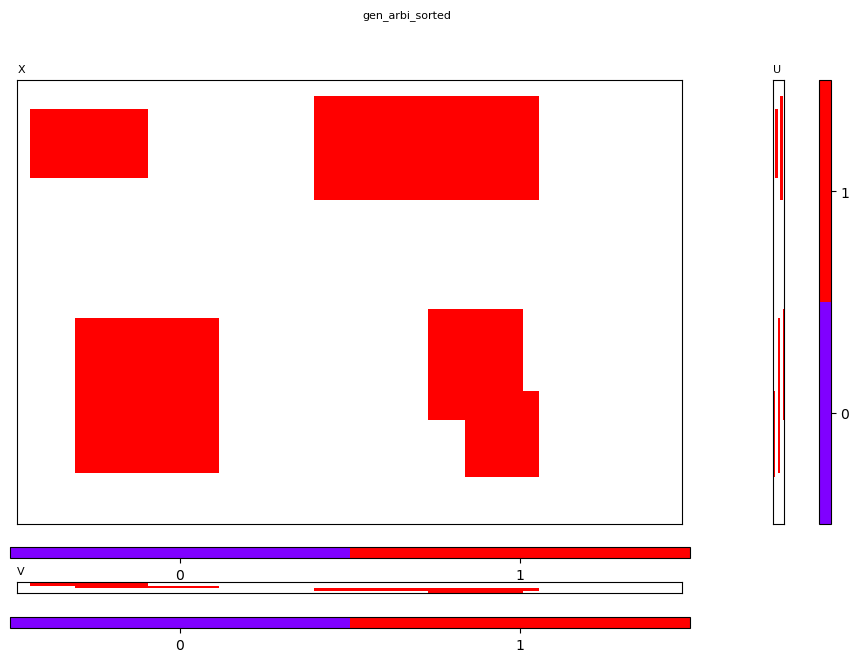

<Figure size 640x480 with 0 Axes>

In [29]:
# 'arbitrary' Boolean matrix with randomly distributed blocks

gen_arbi_sorted = BlockMatrixGenerator(m=n_row, n=n_col, k=5, overlap_flag=True, size_range=[0.5, 2.0, 0.5, 2.0])
gen_arbi_sorted.generate() # if no seed assigned, use time instead

gen_arbi_sorted.show_matrix(title="gen_arbi_sorted")

# 3. Synthetic Boolean matrix

`SyntheticMatrixGenerator` generates a synthetic Boolean matrix which can later be matrix-wise shuffled, factor-wise shuffled or noised.

A synthetic Boolean matrix is not continuous-1's property (C1P) by nature.

This generation procedure is based on the description of PRIMPing paper by Sibylle Hess et al. (2019)

The scheme is similar to those used by Miettinen and Vreeken (2014); Karaev et al. (2015) and Lucchese et al. (2014)

[I] m            : 200
[I] n            : 300
[I] k            : 5
[I] density      : 2
[I] seed         : 1721724072
[I] Using RandomState.
[I] Using RandomState.


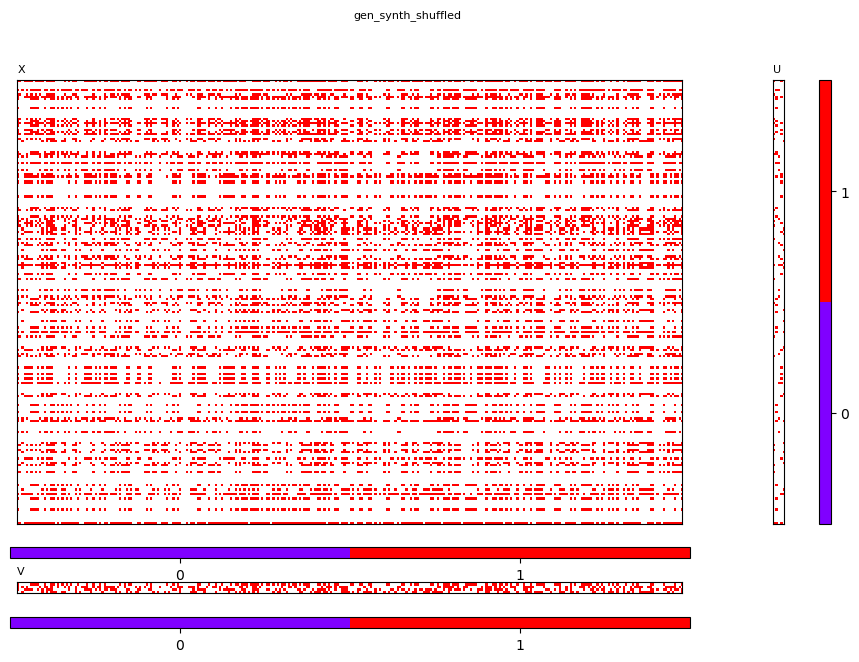

<Figure size 640x480 with 0 Axes>

In [ ]:
# synthetic Boolean matrix

gen_synth_shuffled = SyntheticMatrixGenerator(m=n_row, n=n_col, k=k, density=[0.1, 0.4])
gen_synth_shuffled.generate()

gen_synth_shuffled.show_matrix(title="gen_synth_shuffled")